Step 1: Loading libraries
-----------------------------

In [2]:
%reset -f
%matplotlib inline


import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
import matplotlib.pyplot as plt 

from nilearn import plotting 
from nilearn.connectome import sym_matrix_to_vec, vec_to_sym_matrix

from scipy import spatial

/home/finc/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def upper_tri_masking(A):
    'function which vectorize matrix'
    m = A.shape[0]
    r = np.arange(m)
    mask = r[:, None] < r
    return A[mask]

Step 2: Loading data
-----------------------------

In [7]:
top_dir = '/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/'
out_dir = '/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/'

#cor_mat = np.load(top_dir + 'LearningBrain_matrices_all_lp_0.08_aCompCor_power.npy')

#cor_mat[16, 1, 0, :, :] = 0 # zeroing missing data
#cor_mat[34, 1, 0, :, :] = 0

#cor_mat.shape

Step 3: Creating vectors with subjects to exclude
---------------------------------------------------------

In [8]:
# Selecting subjects which finished the study

groups = pd.read_csv('/home/finc/Dropbox/Projects/LearningBrain/github/LearningBrain_networks/data/behavioral/group_assignment.csv')

trained = (groups.group == 'Experimental') | (groups.group == 'Control')
trained_subs = groups[trained]['sub']
subs = pd.Series.tolist(trained_subs)


# Selecting subjects to exclude

# dualnback

dualnback_exclude = ['sub-13', 'sub-21', 'sub-23', 'sub-50'] # higly motion subjects in one of four sessions
rest_exclude = ['sub-20', 'sub-44', 'sub-21', 'sub-46', 'sub-47'] # higly motion subjects in one of four sessions / missing data(20-44)

dual_vector = []
rest_vector = []
first_vector = np.array(subs) ==  'sub-21' # subject with highly motion on first session

for sub in subs:
    if sub in dualnback_exclude:
        dual_vector.append(False)
    else:
        dual_vector.append(True)


for sub in subs:
    if sub in rest_exclude:
        rest_vector.append(False)
    else:
        rest_vector.append(True)

Step 4: Calcularing similarity between matrices
----------------------------------------------------

In [136]:
cor_mat = cor_mat[:,:,1:,:,:] # selecting dualnback conditions

In [12]:
cor_mat.shape

(46, 4, 340, 264)

In [9]:
cor_mat = np.load(top_dir + 'LearningBrain_dualnback_timeseries_acompcor_24par_008_25.npy')


In [10]:

subs = len(cor_mat[:,0,0,0,0])
sess = len(cor_mat[0,:,0,0,0])
cond = len(cor_mat[0,0,:,0,0])

K = np.zeros((subs, sess * cond, sess * cond))

i = 0
j = 0

for sub in range(subs):
    for ses in range(sess):
        for con in range(cond):
            for sesx in range(sess):
                for conx in range(cond):
                    A = upper_tri_masking(cor_mat[sub, ses, con, :, :])
                    B = upper_tri_masking(cor_mat[sub, sesx, conx, :, :])
                    similarity = 1 - spatial.distance.cosine(A, B)
                    K[sub, i, j] = similarity
                    j += 1
            i += 1
            j = 0
    i = 0


IndexError: too many indices for array

In [139]:
# Creating groups vectors

groups = pd.read_csv('/home/finc/Dropbox/Projects/LearningBrain/github/LearningBrain_networks/data/behavioral/group_assignment.csv')

trained = (groups.group == 'Experimental') | (groups.group == 'Control')
trained_subs = groups[trained]

experimental = (trained_subs == 'Experimental')
control = (trained_subs == 'Control')

exp_vector = experimental['group'].values * dual_vector
con_vector = control['group'].values * dual_vector


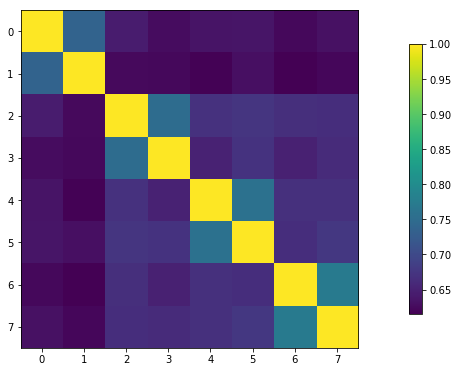

In [140]:
experimental = K[exp_vector,:,:]
control = K[con_vector,:,:]


exp = experimental.mean(axis = 0)
con = control.mean(axis = 0)

plotting.plot_matrix(exp, cmap="viridis")

In [141]:
print(exp[1,0])
print(exp[3,2])
print(exp[5,4])
print(exp[7,6])

0.736897424056
0.750390368506
0.759378034119
0.772787889331


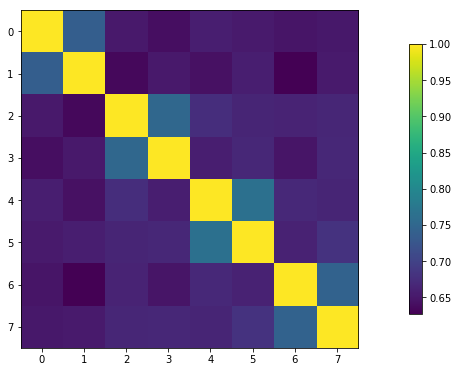

In [142]:
plotting.plot_matrix(con, cmap="viridis")

In [122]:
print(con[1,0])
print(con[3,2])
print(con[5,4])
print(con[7,6])

0.738791047324
0.751528588581
0.764402857971
0.743719901152


In [149]:
modules = pd.read_csv('/home/finc/Dropbox/Projects/LearningBrain/code/modules.txt', sep = " ", header = None)

mod = modules[0].values

DMFP = (mod == 'DM')|(mod == 'FP')
DM = (mod == 'DM')
FP = (mod == 'FP')

DMFP

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [150]:
from scipy import spatial

subs = len(cor_mat[:,0,0,0,0])
sess = len(cor_mat[0,:,0,0,0])
cond = len(cor_mat[0,0,:,0,0])

K = np.zeros((subs, sess * cond, sess * cond))
cor_matx = cor_mat[:,:,:,:,DMFP]
cor_matx = cor_matx[:,:,:,DMFP,:]



In [151]:
K_net = np.zeros((subs, sess * cond, sess * cond))

i = 0
j = 0

for sub in range(subs):
    for ses in range(sess):
        for con in range(cond):
            for sesx in range(sess):
                for conx in range(cond):
                    A = upper_tri_masking(cor_matx[sub, ses, con, :, :])
                    B = upper_tri_masking(cor_matx[sub, sesx, conx, :, :])
                    similarity = 1 - spatial.distance.cosine(A, B)
                    K_net[sub, i, j] = similarity
                    j += 1
            i += 1
            j = 0
    i = 0


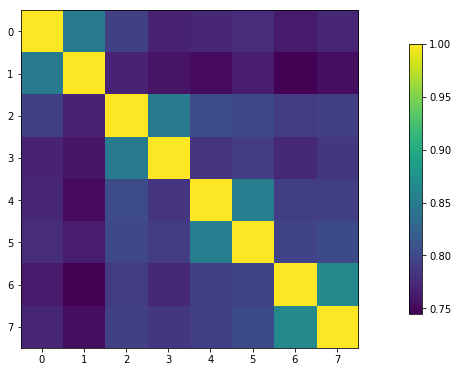

In [152]:
experimental_net = K_net[exp_vector,:,:]
control_net = K_net[con_vector,:,:]


exp_net = experimental_net.mean(axis = 0)
con_net = control_net.mean(axis = 0)

plotting.plot_matrix(exp_net, cmap="viridis")

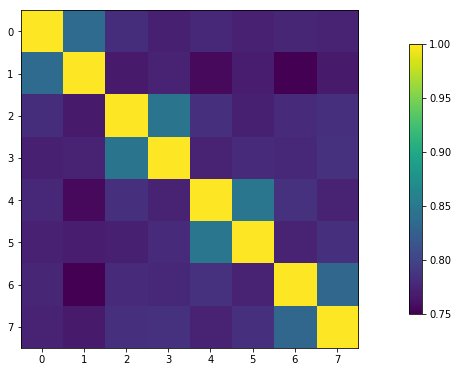

In [153]:
plotting.plot_matrix(con_net, cmap="viridis")

NameError: name 'np' is not defined